In [1]:
# Load the dataset

import pandas as pd

data = pd.read_csv('83_Loeschcke_et_al_2000_Thorax_&_wing_traits_lab pops.csv')

In [2]:
# Dataset overview

data.head()

,Species,Population,Latitude,Longitude,Year_start,Year_end,Temperature,Vial,Replicate,Sex,Thorax_length,l2,l3p,l3d,lpd,l3,w1,w2,w3,wing_loading
0,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,1,female,1.238,2.017,0.659,1.711,2.370,2.370,1.032,1.441,1.192,1.914
1,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,1,male,1.113,1.811,0.609,1.539,2.148,2.146,0.938,1.299,1.066,1.928
2,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,2,female,1.215,1.985,0.648,1.671,2.319,2.319,0.991,1.396,1.142,1.908
3,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,2,male,1.123,1.713,0.596,1.495,2.091,2.088,0.958,1.286,1.062,1.860
4,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,2,1,female,1.218,1.938,0.641,1.658,2.298,2.298,1.010,1.418,1.148,1.886


In [3]:
# Get the features info
print(data.info())

# We compare first few rows and info. 'Thorax_length' and 'wing_loading' appears to be numeric data, but show 'object' Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        1731 non-null   object 
 1   Population     1731 non-null   object 
 2   Latitude       1731 non-null   float64
 3   Longitude      1731 non-null   float64
 4   Year_start     1731 non-null   int64  
 5   Year_end       1731 non-null   int64  
 6   Temperature    1731 non-null   int64  
 7   Vial           1731 non-null   int64  
 8   Replicate      1731 non-null   int64  
 9   Sex            1731 non-null   object 
 10  Thorax_length  1731 non-null   object 
 11  l2             1731 non-null   float64
 12  l3p            1731 non-null   float64
 13  l3d            1731 non-null   float64
 14  lpd            1731 non-null   float64
 15  l3             1731 non-null   float64
 16  w1             1731 non-null   float64
 17  w2             1731 non-null   float64
 18  w3      

In [4]:
# first few rows of 'Thorax_length', 'wing_loading'
print(data.loc[:,('Thorax_length', 'wing_loading')].head())


  Thorax_length wing_loading
0         1.238        1.914
1         1.113        1.928
2         1.215        1.908
3         1.123        1.860
4         1.218        1.886


In [5]:
# Convert 'Thorax_length' and 'wing_loading' to numeric, coercing errors to NaN
data['Thorax_length'] = pd.to_numeric(data['Thorax_length'], errors='coerce')
data['wing_loading'] = pd.to_numeric(data['wing_loading'], errors='coerce')


# Inspect rows with NaN values in any numeric column
all_numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
na_rows = data[data[all_numeric_columns].isna().any(axis=1)].drop_duplicates().sort_index()
print("\nRows with NaN values in any numeric column:")
print(na_rows)


# We see that only row '253' has NAN value


Rows with NaN values in any numeric column:
         Species     Population  Latitude  Longitude  Year_start  Year_end  \
253  D._aldrichi  Gogango_Creek    -23.77     150.17        1994      1994   

     Temperature  Vial  Replicate     Sex  Thorax_length    l2    l3p    l3d  \
253           25     6          3  female            NaN  1.65  0.573  1.415   

       lpd     l3     w1     w2     w3  wing_loading  
253  1.988  1.986  0.898  1.207  1.003           NaN  


In [6]:
# Inspect all numeric columns for data entry inconsistencies
for column in all_numeric_columns:
    print(f"\nUnique values in '{column}':")
    print(data[column].unique())

# Geographic and Experimental Parameters:

# Latitude and Longitude have limited unique values, consistent with a few distinct sampling locations.
# Temperature has three distinct values, suggesting the dataset involves experiments at different controlled temperatures.
# Vial and Replicate are categorical and seem consistent without anomalies. We change them to categorical

# Thorax_length:

# Range appears consistent with expected biological variation.
# NaN values and potential trailing decimal issues have been addressed.

# wing_loading:

# Contains NaN values which need to be addressed.
# 0.0 value which might need verification.

# Other Measurements (l2, l3p, l3d, lpd, l3, w1, w2, w3):

# 0.0 values in some columns, which might be wrong and need further inspection first


Unique values in 'Latitude':
[-25.52 -23.77 -27.68 -21.77 -25.2 ]

Unique values in 'Longitude':
[151.45 150.17 152.45 148.85 151.17]

Unique values in 'Year_start':
[1994]

Unique values in 'Year_end':
[1994]

Unique values in 'Temperature':
[20 25 30]

Unique values in 'Vial':
[ 1  2  3  4  5  6  7  8  9 10]

Unique values in 'Replicate':
[1 2 3]

Unique values in 'Thorax_length':
[1.238 1.113 1.215 1.123 1.218 1.104 1.127 1.102 1.214 1.115 1.154 1.155
 1.239 1.244 1.169 1.108 1.225 1.124 1.207 1.12  1.23  1.088 1.203 1.151
 1.138 1.17  1.145 1.212 1.269 1.126 1.229 1.1   1.232 1.111 1.134 1.282
 1.24  1.233 1.137 1.097 1.152 1.091 1.143 1.073 1.132 1.101 1.161 1.072
 1.066 1.106 1.081 1.071 1.086 1.157 1.069 1.103 1.192 1.068 1.162 1.142
 1.098 1.175 1.077 1.181 1.096 1.205 1.079 1.13  1.07  1.114 1.033 1.179
 1.211 1.082 1.059 1.184 1.046 1.164 1.107 1.062 0.988 1.048 1.011 1.03
 1.093 1.041 1.044 1.094 1.083 1.131 1.021 1.119 1.02  1.045 1.105 1.039
 0.987 1.058 1.037 0.977 0.992

In [7]:
# Create a new DataFrame with only Latitude and Longitude
location_data = data[['Latitude', 'Longitude']]

# Calculate the number of unique pairs by dropping duplicate rows
unique_location_pairs = location_data.drop_duplicates()


unique_location_pairs

,Latitude,Longitude
0,-25.52,151.45
162,-23.77,150.17
339,-27.68,152.45
511,-21.77,148.85
672,-25.20,151.17


In [8]:
# Create a new column that combines Latitude and Longitude into a single Location identifier
data['Location'] = data.apply(lambda row: f"Location ({row['Latitude']}, {row['Longitude']})", axis=1)

# Now, you can drop the original Latitude and Longitude columns if they are no longer needed
data = data.drop(columns=['Latitude', 'Longitude'])




In [9]:
unique_locations = data['Location'].unique()

# Print the unique location values
print(unique_locations)

['Location (-25.52, 151.45)' 'Location (-23.77, 150.17)'
 'Location (-27.68, 152.45)' 'Location (-21.77, 148.85)'
 'Location (-25.2, 151.17)']


In [10]:
# Convert 'vial', 'replicate' Temperature', 'Population', and 'Sex' to categorical
data['Vial'] = data['Vial'].astype('category')
data['Replicate'] = data['Replicate'].astype('category')
data['Temperature'] = data['Temperature'].astype('category')
data['Population'] = data['Population'].astype('category')
data['Sex'] = data['Sex'].astype('category')
data['Species'] = data['Species'].astype('category')
data['Location'] = data['Location'].astype('category')

# Update all_numeric_columns
all_numeric_columns =  data.select_dtypes(include=['float64', 'int64']).columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Species        1731 non-null   category
 1   Population     1731 non-null   category
 2   Year_start     1731 non-null   int64   
 3   Year_end       1731 non-null   int64   
 4   Temperature    1731 non-null   category
 5   Vial           1731 non-null   category
 6   Replicate      1731 non-null   category
 7   Sex            1731 non-null   category
 8   Thorax_length  1730 non-null   float64 
 9   l2             1731 non-null   float64 
 10  l3p            1731 non-null   float64 
 11  l3d            1731 non-null   float64 
 12  lpd            1731 non-null   float64 
 13  l3             1731 non-null   float64 
 14  w1             1731 non-null   float64 
 15  w2             1731 non-null   float64 
 16  w3             1731 non-null   float64 
 17  wing_loading   1730 non-null   fl

In [11]:
rows_with_zero_values = data[(data[all_numeric_columns] == 0).any(axis=1)]

# Print the rows with zero values
print("Rows with zero values:")
print(rows_with_zero_values)

# We see that in row '61' and '698', there are multiple zero values, which are unlikely
# We change them to NAN to deal with the others altogether

Rows with zero values:
         Species Population  Year_start  Year_end Temperature Vial Replicate  \
61   D._aldrichi    Binjour        1994      1994          25    3         1   
698  D._aldrichi    Wahruna        1994      1994          20    5         3   

        Sex  Thorax_length   l2  l3p  l3d  lpd   l3   w1     w2   w3  \
61   female          1.106  0.0  0.6  0.0  0.0  0.0  0.0  1.252  0.0   
698  female          1.151  0.0  0.0  0.0  0.0  0.0  0.0  0.000  0.0   

     wing_loading                   Location  
61            0.0  Location (-25.52, 151.45)  
698           0.0   Location (-25.2, 151.17)  


In [12]:
import pandas as pd
import numpy as np

# Convert zero values to NaN
for column in all_numeric_columns:
    data[column] = data[column].replace(0.0, np.nan)
    
# Verify the conversion
print("Rows with NaN values after converting zeros to NaN:")
print(data[data[all_numeric_columns].isna().any(axis=1)])

# row 61, 253 and 698 now all contain NaN value, we deal with them

Rows with NaN values after converting zeros to NaN:
         Species     Population  Year_start  Year_end Temperature Vial  \
61   D._aldrichi        Binjour        1994      1994          25    3   
253  D._aldrichi  Gogango_Creek        1994      1994          25    6   
698  D._aldrichi        Wahruna        1994      1994          20    5   

    Replicate     Sex  Thorax_length    l2    l3p    l3d    lpd     l3     w1  \
61          1  female          1.106   NaN  0.600    NaN    NaN    NaN    NaN   
253         3  female            NaN  1.65  0.573  1.415  1.988  1.986  0.898   
698         3  female          1.151   NaN    NaN    NaN    NaN    NaN    NaN   

        w2     w3  wing_loading                   Location  
61   1.252    NaN           NaN  Location (-25.52, 151.45)  
253  1.207  1.003           NaN  Location (-23.77, 150.17)  
698    NaN    NaN           NaN   Location (-25.2, 151.17)  


In [13]:
# Due to minimum amount of NAN values of row, we simply remove them
data.drop([61,253,698], axis=0, inplace=True)
# Check if we successfully removed the NAN values
data.isna().any().any()

False

In [14]:
# Statistical summary
print(data.describe())
#'Year_start' and 'Year_end' all share the same value


       Year_start  Year_end  Thorax_length           l2          l3p  \
count      1728.0    1728.0    1728.000000  1728.000000  1728.000000   
mean       1994.0    1994.0       1.126501     1.725973     0.586193   
std           0.0       0.0       0.065632     0.154921     0.051768   
min        1994.0    1994.0       0.931000     1.347000     0.459000   
25%        1994.0    1994.0       1.081000     1.607000     0.547000   
50%        1994.0    1994.0       1.126000     1.722500     0.585000   
75%        1994.0    1994.0       1.172000     1.840000     0.624000   
max        1994.0    1994.0       1.299000     2.095000     0.742000   

               l3d          lpd           l3           w1           w2  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      1.457535     2.043562     2.042683     0.915105     1.252947   
std       0.118176     0.164270     0.164430     0.067386     0.102529   
min       1.114000     1.610000     1.609000     0.7440

In [15]:
# Dropped “Year_start” and “Year_end”, they don’t provide insights if we only use a single dataset (all share same value 1994)
data.drop(['Year_start', 'Year_end'], axis=1, inplace=True)

# Update all_numeric_columns
all_numeric_columns =  data.select_dtypes(include=['float64', 'int64']).columns

In [16]:
 # Check for duplicate rows
duplicate_rows = data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# No duplicates

Number of duplicate rows: 0


In [17]:
# Check the categorical columns (after cutting 'Thorax_length' and 'wing_loading')

# List unique values and their frequencies for categorical columns
all_categorical_columns = [col for col in data.columns if data[col].dtype == 'category']

for column in all_categorical_columns:
    print(f"Unique values in {column}:")
    print(data[column].value_counts())
    print('\n')

# Categorical data looks fine

Unique values in Species:
Species
D._buzzatii    891
D._aldrichi    837
Name: count, dtype: int64


Unique values in Population:
Population
Gogango_Creek    353
Grandchester     349
Wahruna          345
Oxford_Downs     341
Binjour          340
Name: count, dtype: int64


Unique values in Temperature:
Temperature
25    579
20    577
30    572
Name: count, dtype: int64


Unique values in Vial:
Vial
5     177
8     177
6     175
7     173
2     172
4     172
9     172
10    172
1     170
3     168
Name: count, dtype: int64


Unique values in Replicate:
Replicate
1    599
2    586
3    543
Name: count, dtype: int64


Unique values in Sex:
Sex
male      872
female    856
Name: count, dtype: int64


Unique values in Location:
Location
Location (-23.77, 150.17)    353
Location (-27.68, 152.45)    349
Location (-25.2, 151.17)     345
Location (-21.77, 148.85)    341
Location (-25.52, 151.45)    340
Name: count, dtype: int64




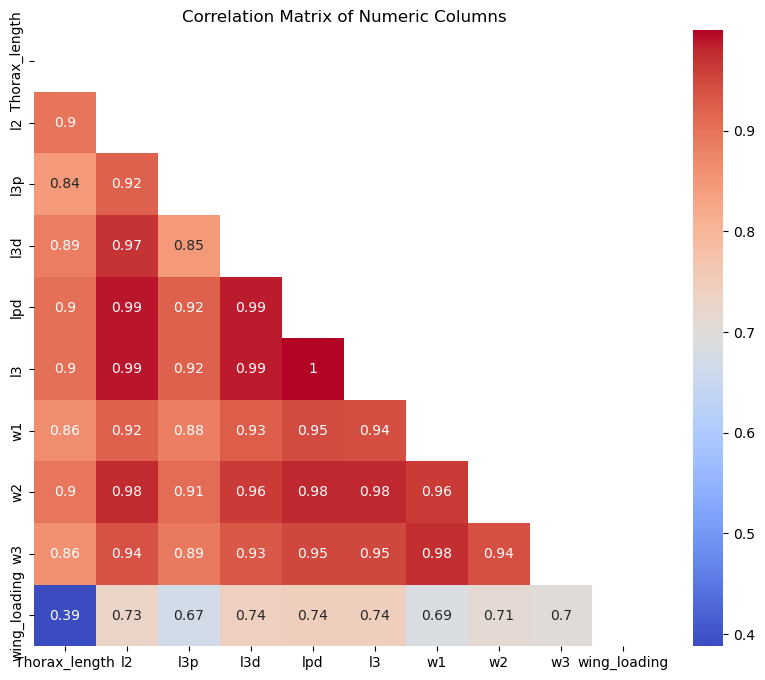

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

all_numeric_columns = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix from this DataFrame
correlation_matrix = all_numeric_columns.corr()

# Create a mask for the upper triangle (common in correlation heatmaps)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the dimensions as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()



In [19]:
import pandas as pd


all_numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()


for column in all_numeric_columns:
    mean_original = data[column].mean()
    std_original = data[column].std()
 
    print(f"Column: {column}, Mean: {mean_original}, Std: {std_original}")


Column: Thorax_length, Mean: 1.1265005787037037, Std: 0.06563241851270642
Column: l2, Mean: 1.7259733796296297, Std: 0.15492104340754462
Column: l3p, Mean: 0.5861927083333334, Std: 0.051768128239334334
Column: l3d, Mean: 1.4575347222222221, Std: 0.11817562210013156
Column: lpd, Mean: 2.0435624999999997, Std: 0.1642704163485287
Column: l3, Mean: 2.0426834490740737, Std: 0.1644301662923777
Column: w1, Mean: 0.9151047453703703, Std: 0.06738634533344974
Column: w2, Mean: 1.2529467592592591, Std: 0.10252923969476556
Column: w3, Mean: 1.0395011574074073, Std: 0.08248140636458756
Column: wing_loading, Mean: 1.811679398148148, Std: 0.06817923340104001


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

all_numeric_columns = data.select_dtypes(include=[np.number])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(all_numeric_columns)  # Scaling is important for PCA

# Initialize and fit PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
principal_components = pca.fit_transform(data_scaled)

# Explained variance by each component
explained_variance = pca.explained_variance_ratio_
total_variance_explained = np.sum(explained_variance)

# Create a DataFrame for principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("Variance explained by each component:", explained_variance)
print("Total variance explained:", total_variance_explained)

# Display the first few rows of principal components
print(principal_df.head())





Variance explained by each component: [0.89884037 0.06313771]
Total variance explained: 0.9619780712732408
        PC1       PC2
0 -5.719656  0.107209
1 -1.685873  1.487611
2 -4.605792  0.284268
3 -0.881411  0.575929
4 -4.461361 -0.024122


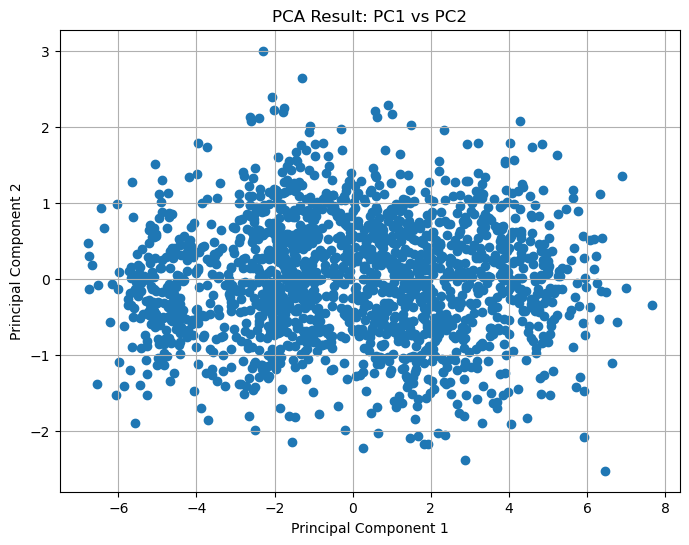

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.title('PCA Result: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [22]:
principal_df

,PC1,PC2
0,-5.719656,0.107209
1,-1.685873,1.487611
2,-4.605792,0.284268
3,-0.881411,0.575929
4,-4.461361,-0.024122
...,...,...
1723,4.046773,0.567975
1724,1.064100,-0.688552
1725,4.311557,0.592475
1726,2.021033,-0.684565


In [38]:
import pandas as pd



# Convert Boolean columns to integers (0s and 1s)
for column in data.columns:
    if data[column].dtype == bool:
        data[column] = data[column].astype(int)

# List of all categorical columns expected to be in the DataFrame
# Please ensure these columns actually exist in your DataFrame
# If any of these columns might not exist, you'll need to check before attempting to process them
categorical_columns = ['Location', 'Population', 'Replicate', 'Sex', 'Species', 'Temperature', 'Vial']
existing_categorical_columns = [col for col in categorical_columns if col in data.columns]

# Manually one-hot encode categorical columns that exist in the DataFrame
for column in existing_categorical_columns:
    dummies = pd.get_dummies(data[column], prefix=column)
    data = pd.concat([data.drop(column, axis=1), dummies], axis=1)



# Reset indices to ensure they are aligned
data.reset_index(drop=True, inplace=True)
principal_df.reset_index(drop=True, inplace=True)

# Exclude numeric columns that were used to generate PCA components
# Add or remove column names as per your specific needs
numeric_columns_used_for_pca = ['Thorax_length', 'l2', 'l3p', 'l3d', 'lpd', 'l3', 'w1', 'w2', 'w3', 'wing_loading']
data = data.drop(columns=[col for col in numeric_columns_used_for_pca if col in data.columns], errors='ignore')

# Concatenate the data DataFrame with the PCA components
final_df = pd.concat([data, principal_df], axis=1)


   Location_Location (-21.77, 148.85)  Location_Location (-23.77, 150.17)  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   Location_Location (-25.2, 151.17)  Location_Location (-25.52, 151.45)  \
0                                  0                                   1   
1                                  0                                   1   
2                                  0                                   1   
3                                  0                                   1   
4                                  0                                   1   

   Location_Location (-27.68, 152.45)  Population_Binjour  \
0                  

In [39]:
# Display the final DataFrame structure and a sample of data to ensure everything is as expected
print(final_df.columns)  # This will list all the columns in your final DataFrame
print(final_df.head())   # This will show the first few rows of your DataFrame


Index(['Location_Location (-21.77, 148.85)',
       'Location_Location (-23.77, 150.17)',
       'Location_Location (-25.2, 151.17)',
       'Location_Location (-25.52, 151.45)',
       'Location_Location (-27.68, 152.45)', 'Population_Binjour',
       'Population_Gogango_Creek', 'Population_Grandchester',
       'Population_Oxford_Downs', 'Population_Wahruna', 'Replicate_1',
       'Replicate_2', 'Replicate_3', 'Sex_female', 'Sex_male',
       'Species_D._aldrichi', 'Species_D._buzzatii', 'Temperature_20',
       'Temperature_25', 'Temperature_30', 'Vial_1', 'Vial_2', 'Vial_3',
       'Vial_4', 'Vial_5', 'Vial_6', 'Vial_7', 'Vial_8', 'Vial_9', 'Vial_10',
       'PC1', 'PC2'],
      dtype='object')
   Location_Location (-21.77, 148.85)  Location_Location (-23.77, 150.17)  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                        

In [40]:
import pandas as pd

# Assuming 'final_df' is your main DataFrame and 'principal_df' contains the PCA components
# Ensure final_df does not already include 'PC1' and 'PC2' before resetting the index
if 'PC1' in final_df.columns and 'PC2' in final_df.columns:
    final_df.drop(['PC1', 'PC2'], axis=1, inplace=True)

# Reset indices if necessary to align the rows correctly
final_df.reset_index(drop=True, inplace=True)
principal_df.reset_index(drop=True, inplace=True)

# Correctly merge the PCA components into the final DataFrame without duplicating columns
final_df = pd.concat([final_df, principal_df], axis=1)

# Display the final DataFrame to verify the changes
final_df

,"Location_Location (-21.77, 148.85)","Location_Location (-23.77, 150.17)","Location_Location (-25.2, 151.17)","Location_Location (-25.52, 151.45)","Location_Location (-27.68, 152.45)",Population_Binjour,Population_Gogango_Creek,Population_Grandchester,Population_Oxford_Downs,Population_Wahruna,...,Vial_3,Vial_4,Vial_5,Vial_6,Vial_7,Vial_8,Vial_9,Vial_10,PC1,PC2
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-5.719656,0.107209
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.685873,1.487611
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-4.605792,0.284268
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.881411,0.575929
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-4.461361,-0.024122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,4.046773,0.567975
1724,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1.064100,-0.688552
1725,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,4.311557,0.592475
1726,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,2.021033,-0.684565


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create a single 'species' column from one-hot encoded species data
conditions = [
    (final_df['Species_D._aldrichi'] == 1),
    (final_df['Species_D._buzzatii'] == 1)
]
choices = ['D._aldrichi', 'D._buzzatii']
final_df['species'] = np.select(conditions, choices, default='Other')

# Now drop the original one-hot encoded species columns
final_df.drop(['Species_D._aldrichi', 'Species_D._buzzatii'], axis=1, inplace=True)

# Set 'species' as the target
y = final_df['species']
X = final_df.drop('species', axis=1)  # Exclude the target variable from the features

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=66)

# Initialize and train the RandomForest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=66)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5163776493256262
Classification Report:
               precision    recall  f1-score   support

 D._aldrichi       0.51      0.46      0.48       255
 D._buzzatii       0.52      0.57      0.54       264

    accuracy                           0.52       519
   macro avg       0.52      0.52      0.51       519
weighted avg       0.52      0.52      0.52       519



In [45]:
import pandas as pd

# Feature Importances
importances = clf.feature_importances_
feature_names = final_df.drop(['species'], axis=1).columns
feature_importance_dict = dict(zip(feature_names, importances))

# Create a DataFrame and display it
importances_df = pd.DataFrame(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True),
                              columns=['Feature', 'Importance'])
print("Feature Importances:")
print(importances_df)




Feature Importances:
                               Feature  Importance
0                                  PC1    0.308715
1                                  PC2    0.267089
2                          Replicate_1    0.023454
3                          Replicate_2    0.023364
4                          Replicate_3    0.022491
5                       Temperature_30    0.021023
6                       Temperature_25    0.020144
7                           Sex_female    0.019221
8                             Sex_male    0.018684
9                               Vial_8    0.017864
10                      Temperature_20    0.017370
11                             Vial_10    0.016895
12                              Vial_7    0.016749
13                              Vial_4    0.016604
14                              Vial_5    0.016486
15                              Vial_9    0.015906
16                              Vial_2    0.015481
17                              Vial_1    0.015476
18        

In [46]:
# Hyperparameter Tuning with Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

# Re-train with the best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print("Improved Accuracy:", accuracy_score(y_test, y_pred))
print("Improved Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Improved Accuracy: 0.5857418111753372
Improved Classification Report:
               precision    recall  f1-score   support

 D._aldrichi       0.59      0.54      0.56       255
 D._buzzatii       0.59      0.63      0.61       264

    accuracy                           0.59       519
   macro avg       0.59      0.58      0.58       519
weighted avg       0.59      0.59      0.58       519



In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Setup new parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # More options
    'max_depth': [None, 10, 20, 30, 40],   # More depth options
    'min_samples_split': [2, 5, 10, 15],   # More granularity
    'min_samples_leaf': [1, 2, 4, 6],      # More granularity
    'max_features': [None, 'sqrt', 'log2'],  # Different features to consider
    'bootstrap': [True, False],            # Whether to use bootstrap samples
    'criterion': ['gini', 'entropy']       # Different measures for quality of a split
}

# Initialize the classifier
clf = RandomForestClassifier(random_state=66)

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_clf = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_clf.predict(X_test)
print("Improved Accuracy:", accuracy_score(y_test, y_pred))
print("Improved Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 3840 candidates, totalling 11520 fits
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Improved Accuracy: 0.6666666666666666
Improved Classification Report:
               precision    recall  f1-score   support

 D._aldrichi       0.66      0.66      0.66       255
 D._buzzatii       0.67      0.67      0.67       264

    accuracy                           0.67       519
   macro avg       0.67      0.67      0.67       519
weighted avg       0.67      0.67      0.67       519

